In [1]:
import numpy as np
import pandas as pd
import datetime
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
import sys
df = pd.read_csv('C:\\Ashish\\Clustering-Bin-Packing\\src\\main\\resources\\loads_final.csv', parse_dates=["collection_date","delivery_date"])
df.head()

,collection_longitude,collection_latitude,collection_date,delivery_longitude,delivery_latitude,delivery_date,size,id
0,-2.214219,57.239806,2016-10-06 11:00:00,-2.080793,57.140803,2016-10-06 13:00:00,1.000000,1006262
1,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
2,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
3,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
4,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653


In [2]:
# print(len(df))
# df = df[df.collection_longitude < -1.5]
# df = df[df.collection_longitude > -3.5]
# df = df[df.collection_latitude < 60]
# df = df[df.collection_latitude > 55]
# df = df[:100]
# print(len(df))
# df = df[df.collection_date > ('2015-10-06 11:00:00')]
# print(len(df))
X = np.array(list(zip(df['collection_longitude'], df['collection_latitude'])))
# X

In [3]:
def k_means(X, n):
    # kmeans = KMeans(n_clusters=n)
    mbk = MiniBatchKMeans(n_clusters=n, batch_size=10000)
    # kmeans = kmeans.fit(X)
    mbk = mbk.fit(X)
    # labels = kmeans.predict(X)
    labels = mbk.predict(X)
    # C = kmeans.cluster_centers_
    C = mbk.cluster_centers_
    return C, mbk

centr, mb = k_means(X, 21)
# centr, mb = k_means(X, 3)
d = {i: X[np.where(mb.labels_ == i)] for i in range(mb.n_clusters)}
d1 = {i: np.where(mb.labels_ == i)[0] for i in range(mb.n_clusters)}
# print(len(d[0]))
# print(len(d[1]))
# print(len(d[2]))
# print(len(d1[0]))
# print(len(d1[1]))
# print(len(d1[2]))
# # print(centr)
# print(d)
# print(d1)

In [4]:
# k = list(d.keys())
k = list(d.keys())
v = list(d.values())
vids = list(d1.values())
# print(vids)
# print(v)
# print(k)
# print(len(vids[0]))

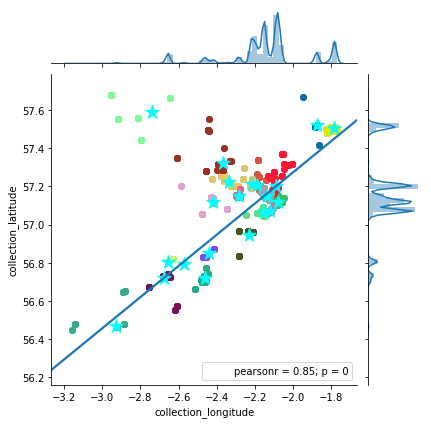

In [5]:
from random import randint
def ret_col():
    hello= ["1","2","3","4","5","6","7","8","9","a","b","c","e","d","f"]
    v="#"
    count=0
    for i in range(0,len(hello)):
        v=v+str(hello[randint(0,14)])
        count+=1
        if(count==6):
            #print(v)
            break
    return v

plt1 = sns.jointplot(x='collection_longitude', y='collection_latitude', data=df, kind='reg')
# col = ['yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
# col = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#0000ff", 'yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
for i in range(0, len(v)):
    plt1.ax_joint.scatter(v[i][:, 0], v[i][:, 1], color = ret_col())
plt.scatter(centr[:, 0], centr[:, 1], marker='*', s=200, c='aqua')
plt.savefig('C:\\Ashish\\Clustering-Bin-Packing\\src\\main\\output\\collection_cluster.jpg')

In [6]:
date_time = []
for i in range(0, len(vids)):
    date_time1 = {}
    for j in range(0, len(vids[i])):
        #date_time1.update({df['collection_date'].iloc[vids[i][j]]: [vids[i][j], df['delivery_date'].iloc[vids[i][j]], df['size'].iloc[vids[i][j]]]})
        date_time1.update({vids[i][j]: df['collection_date'].iloc[vids[i][j]]})
        #date_time1.append(df['collection_date'].iloc[vids[i][j]])
    date_time.append(date_time1)
date_time_sorted = []
for diction in date_time:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted.append(sorted_x)
# date_time_sorted
# date_time

In [7]:
x = len(vids)-1
print(len(vids[x])-1)
date_time_sorted[x][len(date_time_sorted[x])-1]
len(date_time_sorted)

1779


21

In [8]:
l = []
for i in date_time_sorted:
    d = {}
    for j in i:
        key = j[1]
        d.setdefault(key, []).append(j[0])
    l.append(d)
# print(l)
ctr = 0
for i in range(len(l)):
    #print('new location cluster')
    ctr += 1
    for j in l[i]:
        #print('new time cluster')
        ctr += 1
        #print(l[i][j])
        for k in range(len(l[i][j])):
            ctr += 1
#             print(l[i][j][k])
#             pass
print(ctr)

97561


In [9]:
li = []
for i in l:
    sorted_i = sorted(i.items(), key=operator.itemgetter(0))
    li.append(sorted_i)
# li

In [10]:
from __future__ import division

def checkClass(k, a):
    for i in range(k, 1, -1):
        if (a > (1.0/i) and a <= (1.0/(i-1))):
            clas = (i-1)
            break
        else:
            clas = k
    return (clas-1)

def nextFit(weight, n, c):
    res = 1
    bin_rem = c
    for i in range(0, n):
        if (weight[i] > bin_rem):
            res = res + 1
            bin_rem = c - weight[i]
        else:
            bin_rem = bin_rem - weight[i]
    return res

def harmonic(items_normal, cap, k):
    items = [i/cap for i in items_normal]
    bins_k = [] #items divided n classes, list of list
    res_k = [] #bins required in every class
    for i in range(0, k):
        classes = [] #single list
        bins_k.append(classes)
    for item in items:
        clas = checkClass(k, item)
        bins_k[clas].append(item)
    for classes in bins_k:
        if (len(classes) != 0):
            bins = nextFit(classes, len(classes), 1)
        else:
            bins = 0
        res_k.append(bins)
        #print(classes)
    res = 0
    #print(bins_k)
    for i in bins_k:
        pass
        #print(len(i))
    for r in res_k:
        res = res + r
    #print(res_k)
    return res

# def main():
#     it = [42,69,67,57,93,90,38,36,45,42,33,79,27,57,44,84,86,92,46,38,85,33,82,73,49,70,59,23,57,72,74,69,33,42,28,46,30,64,29,74,41,49,55,98,80,32,25,38,82,30,35,39,57,84,62,50,55,27,30,36,20,78,47,26,45,41,58,98,91,96,73,84,37,93,91,43,73,85,81,79,71,80,76,83,41,78,70,23,42,87,43,84,60,55,49,78,73,62,36,44,94,69,32,96,70,84,58,78,25,80,58,66,83,24,98,60,42,43,43,39]
#     c = 150
#     bins_required = harmonic(it, c, 4)
#     print(bins_required)
    
# main()

67


In [11]:
d = []
for i in li:
    d1 = []
    for j in i:
        temp = j[1]
        for k in j[1]:
            d1.append(df['size'].iloc[k])
    d.append(d1)
# d
bins = 0
for i in d:
#     print(i)
    bins += harmonic(i, 1, 4)
print(bins)

53506
